# Single Perceptron Learning

## Introduction

The perceptron is the simplest form of artificial neural network. It's a binary classifier that makes predictions based on a linear predictor function combining weights with the feature vector. The perceptron algorithm was invented in 1957 by Frank Rosenblatt.

### Key Components of a Perceptron:

1. **Input values** (x₁, x₂, ..., xₙ)
2. **Weights** (w₁, w₂, ..., wₙ)
3. **Bias** (b)
4. **Activation function** (typically a step function)

### Basic Perceptron Formula:

$$
y = \begin{cases}
1 & \text{if } \sum_{i=1}^{n} w_i x_i + b > 0 \\
0 & \text{otherwise}
\end{cases}
$$


In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_blobs

## Simple Perceptron Implementation

Let's implement a basic perceptron from scratch. The perceptron will learn to classify points in a 2D plane.


In [ ]:
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iterations=100):
        self.lr = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def activation_function(self, x):
        return 1 if x > 0 else 0

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = [self.activation_function(x) for x in linear_output]
        return np.array(y_predicted)

    def fit(self, X, y):
        # Initialize weights and bias
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Weight update history for visualization
        self.weight_history = []
        self.bias_history = []

        # Training process
        for _ in range(self.n_iterations):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_function(linear_output)

                # Update weights based on the perceptron learning rule
                update = self.lr * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

                # Store weights and bias for visualization
                self.weight_history.append(self.weights.copy())
                self.bias_history.append(self.bias)

## Generating Linearly Separable Data

Let's create a simple dataset to visualize how the perceptron learns.


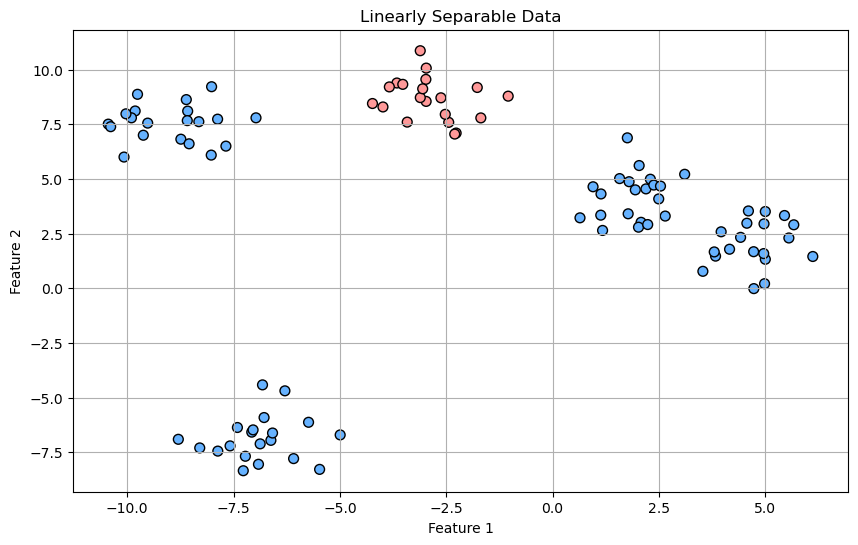

In [ ]:
# Generate linearly separable data
X, y = make_blobs(n_samples=100, centers=5, n_features=2, random_state=42)
y = np.where(y == 0, 0, 1)  # Convert to binary labels (0 and 1)

# Visualize the data
plt.figure(figsize=(10, 6))
plt.scatter(
    X[:, 0], X[:, 1], c=y, cmap=ListedColormap(["#FF9999", "#66B2FF"]), edgecolors="k", s=50
)
plt.title("Linearly Separable Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

## Training the Perceptron

Now let's train our perceptron on this dataset and visualize how the decision boundary evolves.


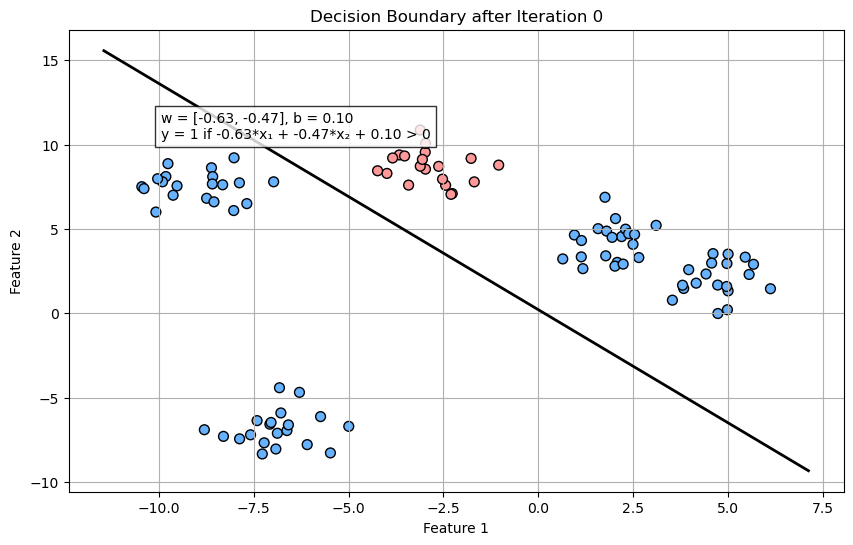

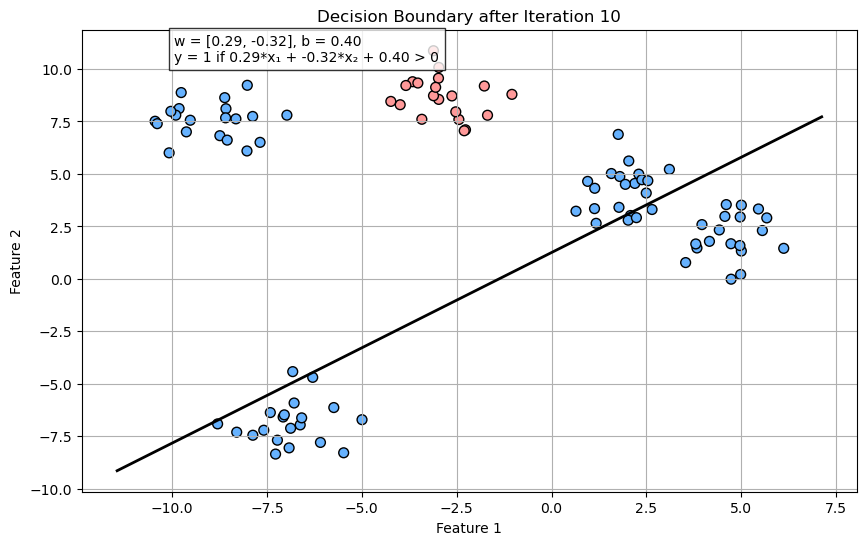

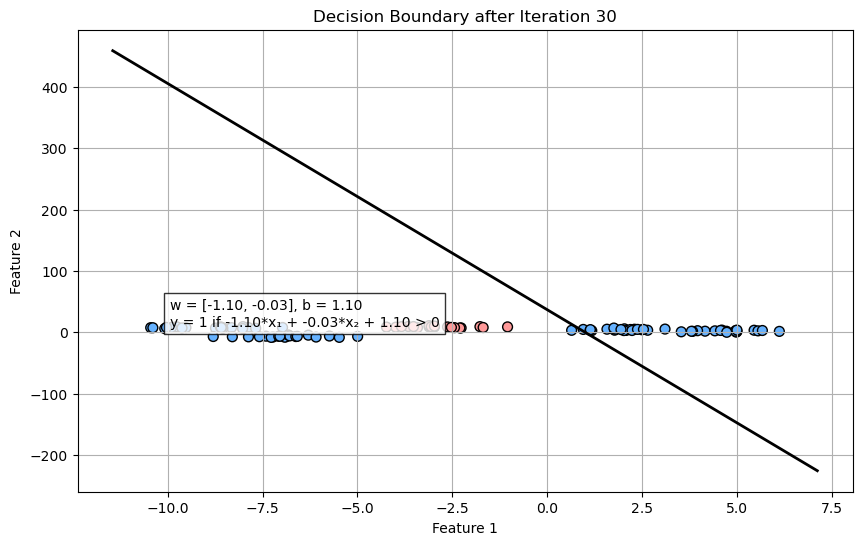

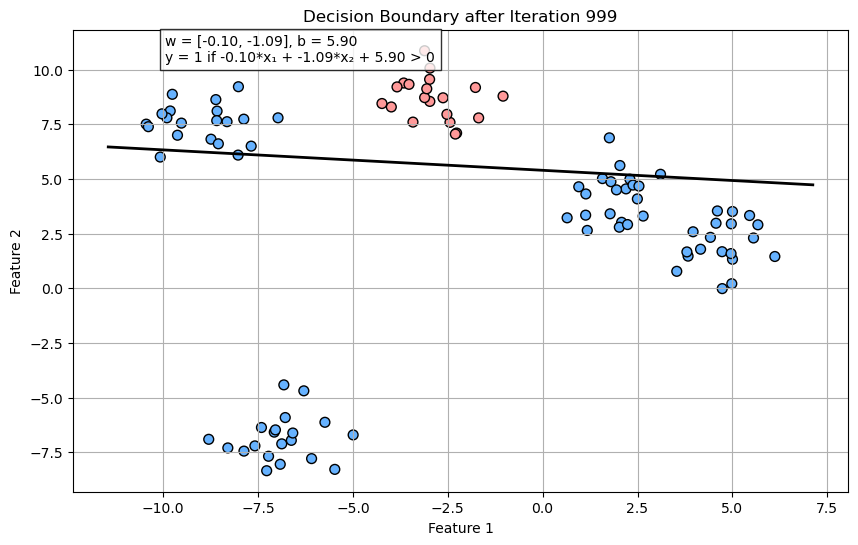

In [ ]:
# Train the perceptron
perceptron = Perceptron(learning_rate=0.1, n_iterations=10)
perceptron.fit(X, y)


# Visualize decision boundary evolution
def plot_decision_boundary(weights, bias, X, y, iteration):
    plt.figure(figsize=(10, 6))
    plt.scatter(
        X[:, 0], X[:, 1], c=y, cmap=ListedColormap(["#FF9999", "#66B2FF"]), edgecolors="k", s=50
    )

    # Decision boundary line equation: w[0]*x + w[1]*y + b = 0 => y = (-w[0]*x - b) / w[1]
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min = (-weights[0] * x_min - bias) / weights[1]
    y_max = (-weights[0] * x_max - bias) / weights[1]

    plt.plot([x_min, x_max], [y_min, y_max], "k-", lw=2)
    plt.title(f"Decision Boundary after Iteration {iteration}")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.text(
        X[:, 0].min() + 0.5,
        X[:, 1].max() - 0.5,
        f"w = [{weights[0]:.2f}, {weights[1]:.2f}], b = {bias:.2f}\ny = 1 if {weights[0]:.2f}*x₁ + {weights[1]:.2f}*x₂ + {bias:.2f} > 0",
        fontsize=10,
        bbox=dict(facecolor="white", alpha=0.8),
    )
    plt.grid(True)
    plt.show()


# Display decision boundary at different points in training
iterations_to_show = [0, 10, 30, len(perceptron.weight_history) - 1]
for i in iterations_to_show:
    if i < len(perceptron.weight_history):
        plot_decision_boundary(perceptron.weight_history[i], perceptron.bias_history[i], X, y, i)

## Weight Evolution During Training

Let's visualize how the weights and bias change during training


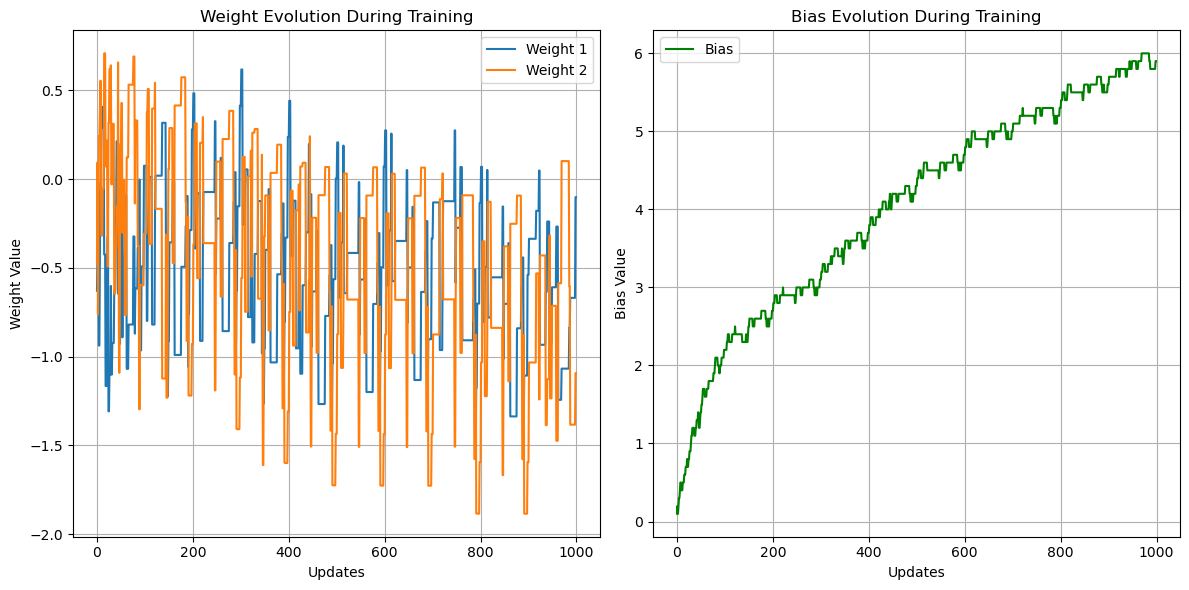

In [ ]:
# Plotting weight changes over iterations
plt.figure(figsize=(12, 6))

weight_history = np.array(perceptron.weight_history)
bias_history = np.array(perceptron.bias_history)

plt.subplot(1, 2, 1)
plt.plot(weight_history[:, 0], label="Weight 1")
plt.plot(weight_history[:, 1], label="Weight 2")
plt.title("Weight Evolution During Training")
plt.xlabel("Updates")
plt.ylabel("Weight Value")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(bias_history, label="Bias", color="green")
plt.title("Bias Evolution During Training")
plt.xlabel("Updates")
plt.ylabel("Bias Value")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Geometric Interpretation of the Perceptron

Let's visualize the geometric meaning of perceptron learning and how it separates data in the feature space.


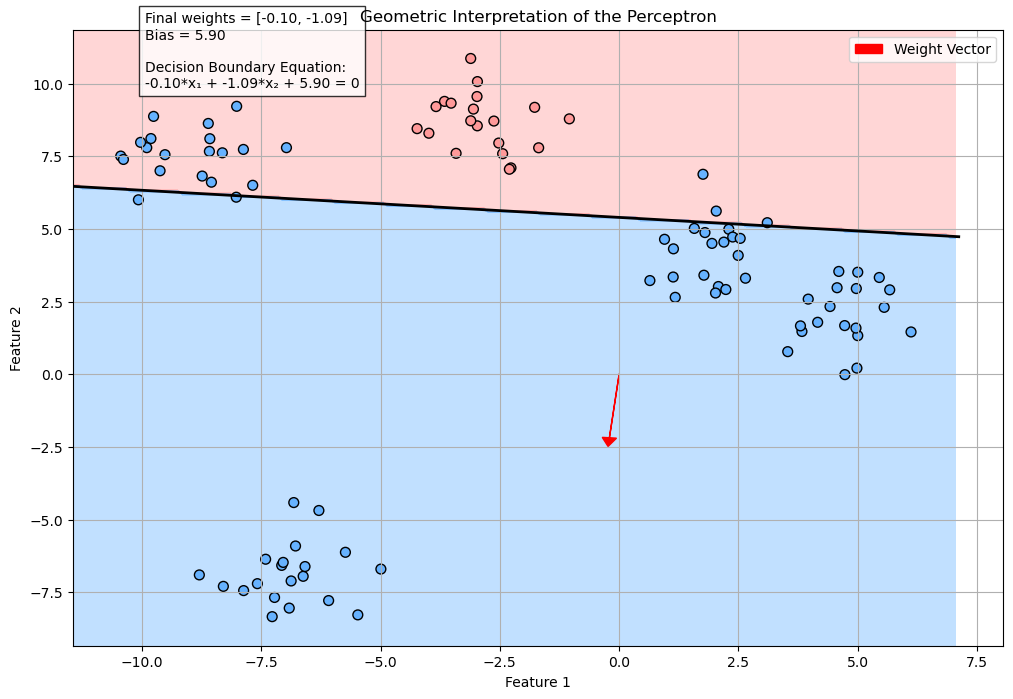

In [ ]:
def visualize_perceptron_geometry():
    # Create a meshgrid to visualize the decision boundary clearly
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

    # Predict class labels for all points in the meshgrid
    Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.figure(figsize=(12, 8))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=ListedColormap(["#FF9999", "#66B2FF"]))
    plt.scatter(
        X[:, 0], X[:, 1], c=y, cmap=ListedColormap(["#FF9999", "#66B2FF"]), edgecolors="k", s=50
    )

    # Plot the decision boundary line
    y_min = (-perceptron.weights[0] * x_min - perceptron.bias) / perceptron.weights[1]
    y_max = (-perceptron.weights[0] * x_max - perceptron.bias) / perceptron.weights[1]
    plt.plot([x_min, x_max], [y_min, y_max], "k-", lw=2)

    # Draw the weight vector (scaled for visibility)
    scale_factor = 2.0
    plt.arrow(
        0,
        0,
        perceptron.weights[0] * scale_factor,
        perceptron.weights[1] * scale_factor,
        head_width=0.3,
        head_length=0.3,
        fc="red",
        ec="red",
        label="Weight Vector",
    )

    # Add annotations and visual elements
    plt.text(
        X[:, 0].min() + 0.5,
        X[:, 1].max() - 1,
        f"Final weights = [{perceptron.weights[0]:.2f}, {perceptron.weights[1]:.2f}]\nBias = {perceptron.bias:.2f}\n\n"
        f"Decision Boundary Equation:\n{perceptron.weights[0]:.2f}*x₁ + {perceptron.weights[1]:.2f}*x₂ + {perceptron.bias:.2f} = 0",
        fontsize=10,
        bbox=dict(facecolor="white", alpha=0.8),
    )

    plt.title("Geometric Interpretation of the Perceptron")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.grid(True)
    plt.legend()
    plt.show()


visualize_perceptron_geometry()

## Advanced Example: Perceptron for Multi-class Classification

Let's implement a more advanced example using a multi-class perceptron approach with the one-vs-rest strategy.


In [ ]:
class MultiClassPerceptron:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.lr = learning_rate
        self.n_iterations = n_iterations
        self.perceptrons = []
        self.classes = None

    def fit(self, X, y):
        self.classes = np.unique(y)
        n_classes = len(self.classes)

        # Train one perceptron per class (one-vs-rest)
        for c in self.classes:
            # Convert to binary problem (class c vs. rest)
            binary_y = np.where(y == c, 1, 0)

            # Create and train a perceptron for this class
            p = Perceptron(learning_rate=self.lr, n_iterations=self.n_iterations)
            p.fit(X, binary_y)
            self.perceptrons.append(p)

        return self

    def predict(self, X):
        # Get confidence scores from each binary classifier
        n_samples = X.shape[0]
        scores = np.zeros((n_samples, len(self.classes)))

        for i, p in enumerate(self.perceptrons):
            # Calculate raw scores (distance from decision boundary)
            scores[:, i] = np.dot(X, p.weights) + p.bias

        # Return class with highest score for each sample
        return self.classes[np.argmax(scores, axis=1)]

## Testing the Multi-class Perceptron


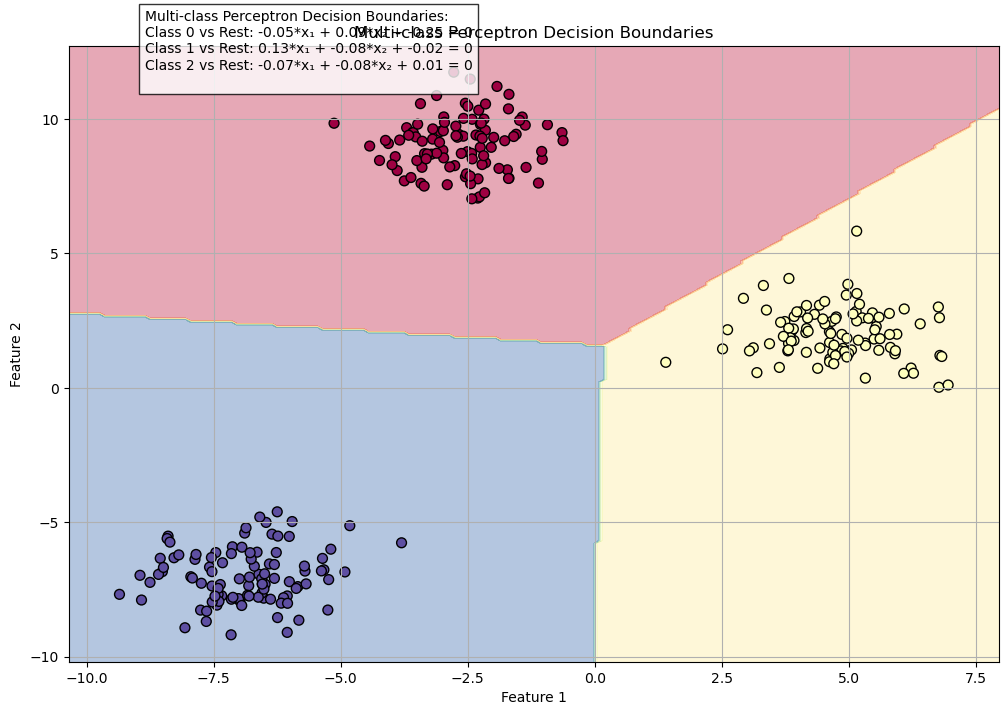

In [ ]:
# Generate multi-class data
X_multi, y_multi = make_blobs(n_samples=300, centers=3, n_features=2, random_state=42)

# Train the multi-class perceptron
multi_perceptron = MultiClassPerceptron(learning_rate=0.01, n_iterations=100)
multi_perceptron.fit(X_multi, y_multi)


# Visualize the multi-class decision boundaries
def plot_multiclass_decision_boundary(perceptron, X, y):
    # Create a meshgrid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

    # Predict class labels for all points in the meshgrid
    Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.figure(figsize=(12, 8))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, edgecolors="k", s=50)

    # Display individual perceptron equations
    info_text = "Multi-class Perceptron Decision Boundaries:\n"
    for i, p in enumerate(perceptron.perceptrons):
        info_text += (
            f"Class {i} vs Rest: {p.weights[0]:.2f}*x₁ + {p.weights[1]:.2f}*x₂ + {p.bias:.2f} = 0\n"
        )

    plt.text(
        X[:, 0].min() + 0.5,
        X[:, 1].max() - 0.5,
        info_text,
        fontsize=10,
        bbox=dict(facecolor="white", alpha=0.8),
    )

    plt.title("Multi-class Perceptron Decision Boundaries")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.grid(True)
    plt.show()


plot_multiclass_decision_boundary(multi_perceptron, X_multi, y_multi)

## Accuracy Evaluation


Multi-class Perceptron Accuracy: 100.00%


C:\Users\super\AppData\Local\Temp\ipykernel_46952\3850829810.py:11: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_multi[~correct, 0], X_multi[~correct, 1], c=y_multi[~correct],


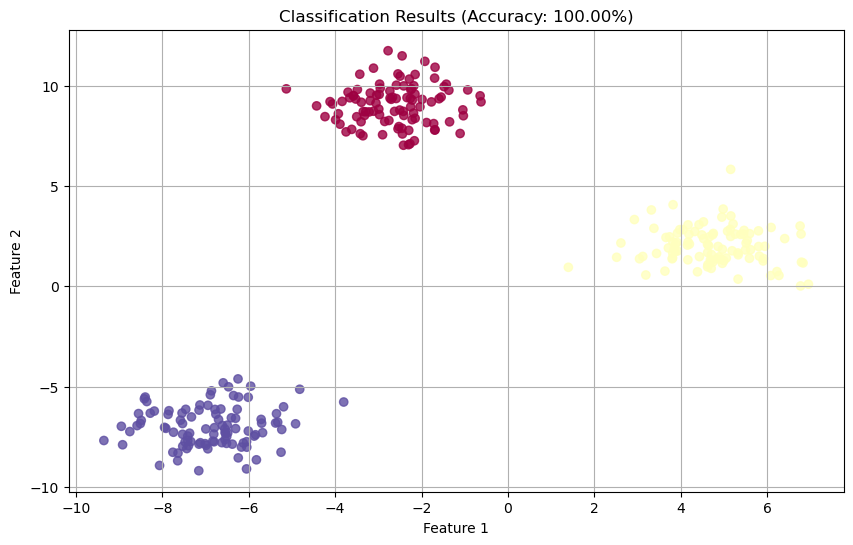

In [ ]:
# Calculate and display the accuracy
y_pred = multi_perceptron.predict(X_multi)
accuracy = np.mean(y_pred == y_multi) * 100
print(f"Multi-class Perceptron Accuracy: {accuracy:.2f}%")

# Visualize correct and incorrect predictions
plt.figure(figsize=(10, 6))
correct = y_pred == y_multi
plt.scatter(
    X_multi[correct, 0],
    X_multi[correct, 1],
    c=y_multi[correct],
    marker="o",
    alpha=0.8,
    cmap=plt.cm.Spectral,
)
plt.scatter(
    X_multi[~correct, 0],
    X_multi[~correct, 1],
    c=y_multi[~correct],
    marker="x",
    s=100,
    alpha=1,
    cmap=plt.cm.Spectral,
    edgecolors="k",
)
plt.title(f"Classification Results (Accuracy: {accuracy:.2f}%)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

## Conclusion

In this notebook, we've explored the perceptron learning algorithm from basic principles to more advanced implementations:

1. We implemented a single perceptron from scratch
2. Visualized the decision boundary and weight updates during training
3. Explored the geometric interpretation of the perceptron
4. Extended to multi-class classification using the one-vs-rest strategy

### Limitations of the Perceptron

The perceptron model has a fundamental limitation: it can only learn linearly separable patterns. For problems that aren't linearly separable (like XOR), we need to move to more complex neural networks with multiple layers.

### Key Equations

- **Prediction**: $y = 1$ if $\sum_{i=1}^{n} w_i x_i + b > 0$ else $0$
- **Weight Update Rule**: $w_i := w_i + \alpha (y_{true} - y_{pred}) \cdot x_i$
- **Bias Update Rule**: $b := b + \alpha (y_{true} - y_{pred})$

Where $\alpha$ is the learning rate.
